In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


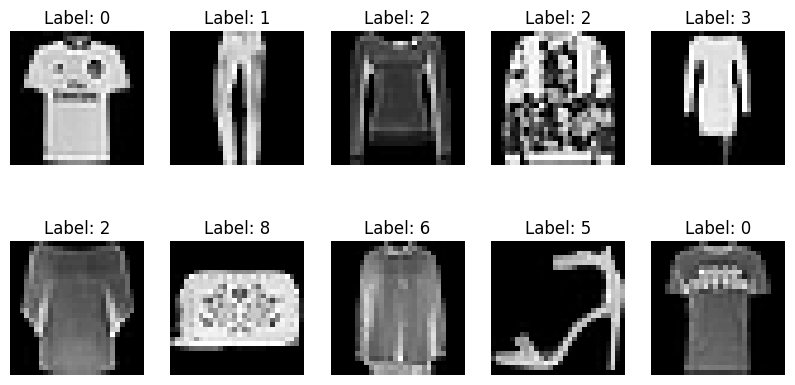

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load the datasets
train_path = '/content/drive/MyDrive/datasets/Copy of fashion-mnist_train.csv'
test_path = '/content/drive/MyDrive/datasets/Copy of fashion-mnist_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df = train_df.head(8000)
test_df = test_df.head(2000)

train_images = train_df.iloc[:, 1:].values / 255.0
test_images = test_df.iloc[:, 1:].values / 255.0

train_labels = train_df.iloc[:, 0].values
test_labels = test_df.iloc[:, 0].values

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image = test_images[i].reshape(28, 28)  # Reshape to 28x28 pixels
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {test_labels[i]}')
    plt.axis('off')
plt.show()

Activation: logistic - Test Accuracy: 0.4405
Activation: tanh - Test Accuracy: 0.8300
Activation: relu - Test Accuracy: 0.8285
Activation: identity - Test Accuracy: 0.8235


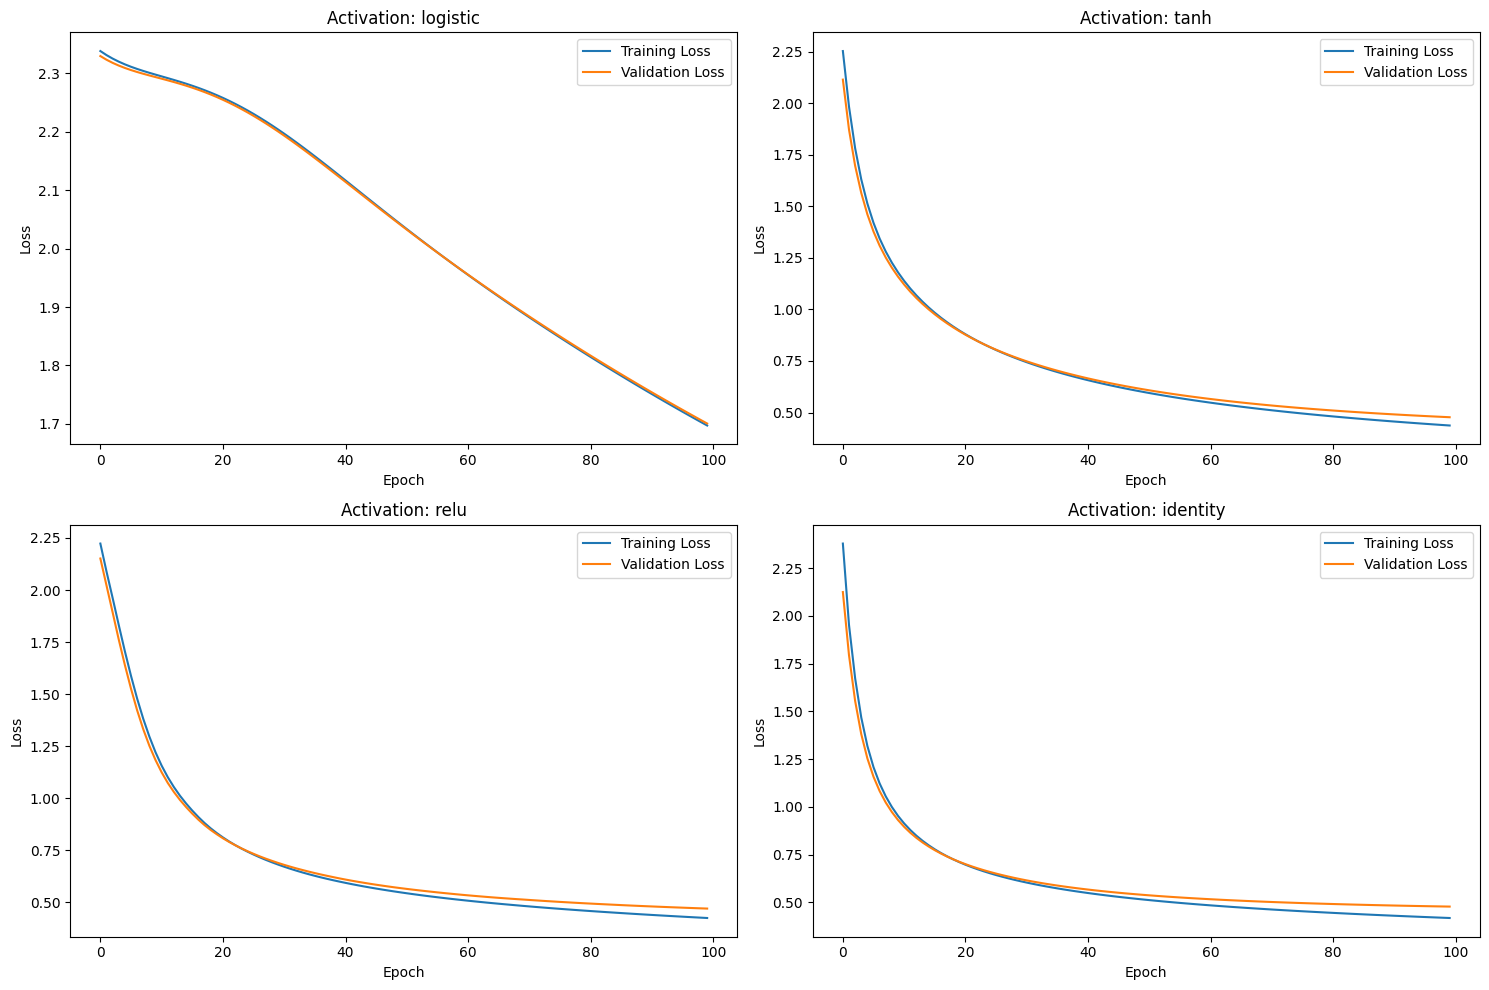

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

hidden_layer_sizes = [128, 64, 32]
max_iter = 100
batch_size = 128
learning_rate_init = 2e-5
activations = ['logistic', 'tanh', 'relu', 'identity']

plt.figure(figsize=(15, 10))
for i, activation in enumerate(activations):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        batch_size=batch_size,
                        learning_rate_init=learning_rate_init,
                        random_state=42,
                        verbose=False)

    train_losses = []
    val_losses = []

    for epoch in range(max_iter):
        mlp.partial_fit(X_train, y_train, classes=np.unique(train_labels))

        train_losses.append(mlp.loss_)

        y_val_pred_proba = mlp.predict_proba(X_val)
        val_loss = -np.mean([np.log(y_val_pred_proba[i, y]) for i, y in enumerate(y_val)])
        val_losses.append(val_loss)

    plt.subplot(2, 2, i + 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'Activation: {activation}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    y_test_pred = mlp.predict(test_images)
    test_accuracy = accuracy_score(test_labels, y_test_pred)
    print(f'Activation: {activation} - Test Accuracy: {test_accuracy:.4f}')

plt.tight_layout()
plt.show()


# TanH gave the best possible performance on the test set as you can see the graph too, tanh and identity gave really good an nearly the same results but with 83% accuracy, tanh was even better

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [1e-5, 2e-5, 5e-5, 1e-4],
    'batch_size': [64, 128, 256]
}

# Initialize MLP with the best activation function (tanh)
mlp = MLPClassifier(hidden_layer_sizes=[128, 64, 32],
                    activation='tanh',
                    max_iter=100,
                    random_state=42)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(train_images, train_labels)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'batch_size': 256, 'learning_rate_init': 0.0001, 'solver': 'adam'}
Best cross-validation accuracy: 0.853875401733823


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# {'batch_size': 256, 'learning_rate_init': 0.0001, 'solver': 'adam'}

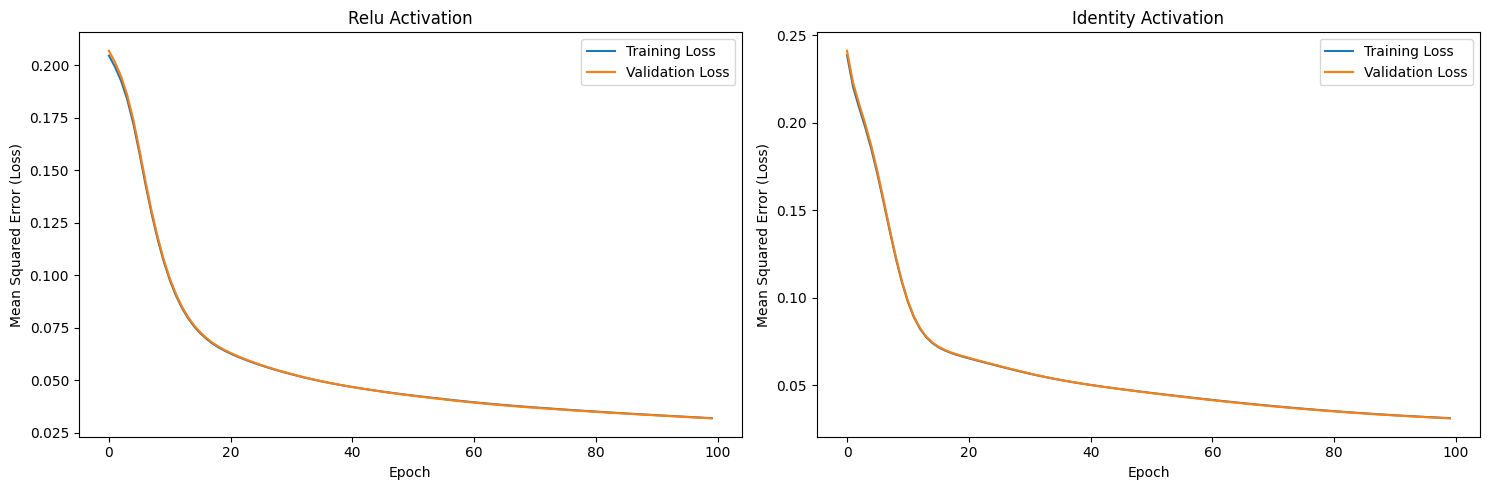

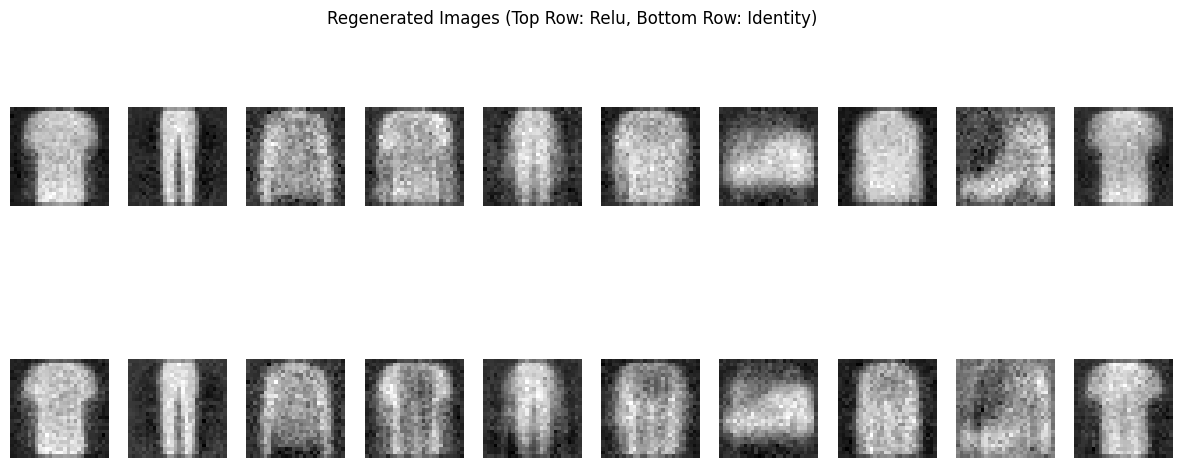

In [ ]:
from sklearn.neural_network import MLPRegressor

layer_sizes = [128, 64, 32, 64, 128]  # c=128, b=64, a=32
max_iter = 100
learning_rate = 2e-5

#  'relu' activation and one with 'identity'
models = {
    'relu': MLPRegressor(hidden_layer_sizes=layer_sizes, activation='relu', solver='adam',
                         learning_rate_init=learning_rate, max_iter=max_iter, batch_size=256, random_state=42),
    'identity': MLPRegressor(hidden_layer_sizes=layer_sizes, activation='identity', solver='adam',
                             learning_rate_init=learning_rate, max_iter=max_iter, batch_size=256, random_state=42)
}

X_train, X_val, _, _ = train_test_split(train_images, train_images, test_size=0.2, random_state=42)

plt.figure(figsize=(15, 5))
for i, (activation, model) in enumerate(models.items()):
    train_losses = []
    val_losses = []

    for epoch in range(max_iter):
        model.partial_fit(X_train, X_train)

        train_loss = np.mean((model.predict(X_train) - X_train) ** 2)
        train_losses.append(train_loss)

        val_loss = np.mean((model.predict(X_val) - X_val) ** 2)
        val_losses.append(val_loss)

    plt.subplot(1, 2, i + 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'{activation.capitalize()} Activation')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error (Loss)')
    plt.legend()

plt.tight_layout()
plt.show()

test_samples = test_images[:10]
plt.figure(figsize=(15, 6))
for i, (activation, model) in enumerate(models.items()):
    regenerated_images = model.predict(test_samples)

    for j in range(10):
        plt.subplot(2, 10, j + 1 + (i * 10))
        plt.imshow(regenerated_images[j].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.ylabel(f'{activation.capitalize()} Activation')

plt.suptitle("Regenerated Images (Top Row: Relu, Bottom Row: Identity)", y=0.95)
plt.show()

In [ ]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score

def extract_features(model, data):
    hidden_layer_model = clone(model)
    hidden_layer_model.set_params(hidden_layer_sizes=[128, 64, 32])  # Up to middle layer only
    hidden_layer_model.fit(data, data)

    feature_vectors = hidden_layer_model.predict(data)
    return feature_vectors

relu_features_train = extract_features(models['relu'], train_images)
relu_features_test = extract_features(models['relu'], test_images)

identity_features_train = extract_features(models['identity'], train_images)
identity_features_test = extract_features(models['identity'], test_images)

smaller_mlp_relu = MLPClassifier(hidden_layer_sizes=[32, 32], activation='tanh',
                                 solver='adam', learning_rate_init=2e-5, max_iter=200, random_state=42)
smaller_mlp_identity = MLPClassifier(hidden_layer_sizes=[32, 32], activation='tanh',
                                     solver='adam', learning_rate_init=2e-5, max_iter=200, random_state=42)

smaller_mlp_relu.fit(relu_features_train, train_labels)
smaller_mlp_identity.fit(identity_features_train, train_labels)

relu_test_pred = smaller_mlp_relu.predict(relu_features_test)
identity_test_pred = smaller_mlp_identity.predict(identity_features_test)

relu_test_accuracy = accuracy_score(test_labels, relu_test_pred)
identity_test_accuracy = accuracy_score(test_labels, identity_test_pred)

print(f"Test Accuracy for smaller MLP with relu features: {relu_test_accuracy:.4f}")
print(f"Test Accuracy for smaller MLP with identity features: {identity_test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Test Accuracy for smaller MLP with relu features: 0.1435
Test Accuracy for smaller MLP with identity features: 0.2780


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#optmized ka try

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Define new layer sizes and hyperparameters for optimized feature extraction
layer_sizes = [128, 64, 64, 64, 128]  # Using a=64 instead of 32 for more feature detail
max_iter = 500
learning_rate = 5e-5

# Step 2: Set up MLPRegressor models with early stopping for feature extraction
models = {
    'relu': MLPRegressor(hidden_layer_sizes=layer_sizes, activation='relu', solver='adam',
                         learning_rate_init=learning_rate, max_iter=max_iter, batch_size=256,
                         random_state=42, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1),
    'identity': MLPRegressor(hidden_layer_sizes=layer_sizes, activation='identity', solver='adam',
                             learning_rate_init=learning_rate, max_iter=max_iter, batch_size=256,
                             random_state=42, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)
}

# Step 3: Function to extract feature vectors (size 'a') from the hidden layer of MLPRegressor
def extract_features(model, data):
    hidden_layer_model = clone(model)  # Clone to avoid altering the original model
    hidden_layer_model.set_params(hidden_layer_sizes=[128, 64, 64])  # Up to middle layer only
    hidden_layer_model.fit(data, data)  # Fit on the data to activate layers

    # Extract feature vector (output of the middle layer)
    feature_vectors = hidden_layer_model.predict(data)
    return feature_vectors

# Train both models on the regeneration task to obtain features
relu_features_train = extract_features(models['relu'], train_images)
relu_features_test = extract_features(models['relu'], test_images)

identity_features_train = extract_features(models['identity'], train_images)
identity_features_test = extract_features(models['identity'], test_images)

# Step 4: Define smaller classifiers using new feature vectors with updated 'a' size
smaller_mlp_relu = MLPClassifier(hidden_layer_sizes=[64, 64], activation='tanh',
                                 solver='adam', learning_rate_init=5e-5, max_iter=200, random_state=42)
smaller_mlp_identity = MLPClassifier(hidden_layer_sizes=[64, 64], activation='tanh',
                                     solver='adam', learning_rate_init=5e-5, max_iter=200, random_state=42)

# Fit the smaller classifiers on extracted features
smaller_mlp_relu.fit(relu_features_train, train_labels)
smaller_mlp_identity.fit(identity_features_train, train_labels)

# Step 5: Predict on test features and calculate accuracy for each classifier
relu_test_pred = smaller_mlp_relu.predict(relu_features_test)
identity_test_pred = smaller_mlp_identity.predict(identity_features_test)

relu_test_accuracy = accuracy_score(test_labels, relu_test_pred)
identity_test_accuracy = accuracy_score(test_labels, identity_test_pred)

print(f"Test Accuracy for optimized MLP with relu features: {relu_test_accuracy:.4f}")
print(f"Test Accuracy for optimized MLP with identity features: {identity_test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy for optimized MLP with relu features: 0.1015
Test Accuracy for optimized MLP with identity features: 0.7815


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
